In [39]:
import numpy as numpy
import pandas as pd
import matplotlib as plt

In [40]:
df =  pd.read_csv("../data/raw/train.csv")

In [41]:
df.head()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,datetime,cbwd_NW,cbwd_SE,cbwd_cv,pm2.5
0,1,-1.580878,-1.922250,0.443328,-0.441894,-0.069353,-0.137667,2010-01-01 00:00:00,1.448138,-0.732019,-0.522096,NaN
1,2,-1.580878,-2.004228,0.345943,-0.379306,-0.069353,-0.137667,2010-01-01 01:00:00,1.448138,-0.732019,-0.522096,NaN
2,3,-1.580878,-1.922250,0.248559,-0.343514,-0.069353,-0.137667,2010-01-01 02:00:00,1.448138,-0.732019,-0.522096,NaN
3,4,-1.580878,-2.168183,0.248559,-0.280926,-0.069353,-0.137667,2010-01-01 03:00:00,1.448138,-0.732019,-0.522096,NaN
4,5,-1.511594,-2.004228,0.151174,-0.218339,-0.069353,-0.137667,2010-01-01 04:00:00,1.448138,-0.732019,-0.522096,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30676 entries, 0 to 30675
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        30676 non-null  int64  
 1   DEWP      30676 non-null  float64
 2   TEMP      30676 non-null  float64
 3   PRES      30676 non-null  float64
 4   Iws       30676 non-null  float64
 5   Is        30676 non-null  float64
 6   Ir        30676 non-null  float64
 7   datetime  30676 non-null  object 
 8   cbwd_NW   30676 non-null  float64
 9   cbwd_SE   30676 non-null  float64
 10  cbwd_cv   30676 non-null  float64
 11  pm2.5     28755 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.8+ MB


In [43]:
#convert datetime icolumn from text to real datatime format
df["datetime"] = pd.to_datetime(df["datetime"])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30676 entries, 0 to 30675
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        30676 non-null  int64         
 1   DEWP      30676 non-null  float64       
 2   TEMP      30676 non-null  float64       
 3   PRES      30676 non-null  float64       
 4   Iws       30676 non-null  float64       
 5   Is        30676 non-null  float64       
 6   Ir        30676 non-null  float64       
 7   datetime  30676 non-null  datetime64[ns]
 8   cbwd_NW   30676 non-null  float64       
 9   cbwd_SE   30676 non-null  float64       
 10  cbwd_cv   30676 non-null  float64       
 11  pm2.5     28755 non-null  float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 2.8 MB


In [44]:
#sort datetime in ascending order from past to future
df = df.sort_values('datetime')


In [45]:
#set datetime column as index for use in time series
df = df.set_index("datetime")



In [46]:
#remove raw where target is missing
df = df.dropna(subset= ["pm2.5"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28755 entries, 2010-01-02 00:00:00 to 2013-07-02 03:00:00
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       28755 non-null  int64  
 1   DEWP     28755 non-null  float64
 2   TEMP     28755 non-null  float64
 3   PRES     28755 non-null  float64
 4   Iws      28755 non-null  float64
 5   Is       28755 non-null  float64
 6   Ir       28755 non-null  float64
 7   cbwd_NW  28755 non-null  float64
 8   cbwd_SE  28755 non-null  float64
 9   cbwd_cv  28755 non-null  float64
 10  pm2.5    28755 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 2.6 MB


<Axes: xlabel='datetime'>

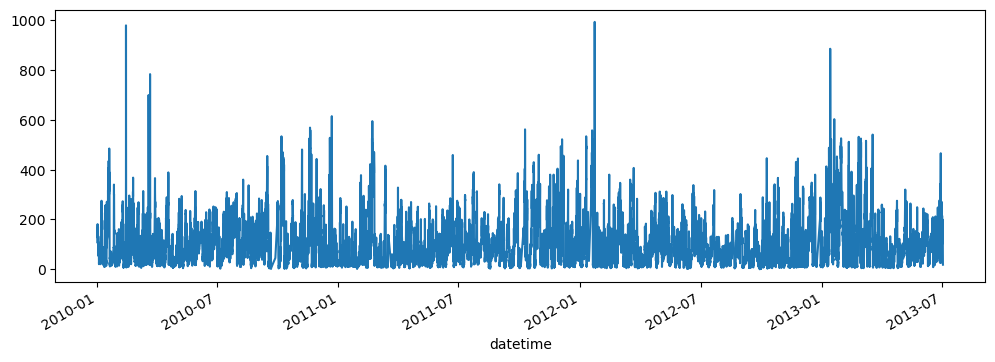

In [48]:
#display pm2.5 value overtime
df["pm2.5"].plot(figsize=(12, 4))

from plot, many sharp spikes appears suddenly and  pollution is not smooth which says past values matters alot .

Lag features

In [49]:
#creation of new column with pm2.5 values from 1hour before for short_term dependencies learning
df["pm2.5_lag_1"] = df["pm2.5"].shift(1)

In [ ]:
#new columns with pm2.5 values from 3 hour before 
df["pm2.5_lag_3"] = df["pm2.5"].shift(3)

In [ ]:
#new columns with pm2.5 values from 3 hour before 
df["pm2.5_lag_24"] = df["pm2.5"].shift(24)

In [ ]:
#drop new columns with missing values
df = df.dropna()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28731 entries, 2010-01-03 00:00:00 to 2013-07-02 03:00:00
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No            28731 non-null  int64  
 1   DEWP          28731 non-null  float64
 2   TEMP          28731 non-null  float64
 3   PRES          28731 non-null  float64
 4   Iws           28731 non-null  float64
 5   Is            28731 non-null  float64
 6   Ir            28731 non-null  float64
 7   cbwd_NW       28731 non-null  float64
 8   cbwd_SE       28731 non-null  float64
 9   cbwd_cv       28731 non-null  float64
 10  pm2.5         28731 non-null  float64
 11  pm2.5_lag_1   28731 non-null  float64
 12  pm2.5_lag_3   28731 non-null  float64
 13  pm2.5_lag_24  28731 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 3.3 MB


In [ ]:
#save training data
df.to_csv("../data/processed/pm2.5_prepared.scv")